
# How ReLU Activation Functions Solve Problems That Linear Models Cannot

*This is a reading recap from Chapter 6.1 of the Deep Learning book, demonstrating how ReLU activation functions enable neural networks to solve the XOR problem that linear models fundamentally cannot handle.*

The XOR (exclusive OR) problem serves as the perfect example to understand why nonlinear activation functions are essential in neural networks. This analysis shows the limitations of linear models and demonstrates how ReLU activation functions provide the solution.

## The XOR Problem: A Challenge for Linear Models

The XOR function is defined as:
- XOR(0,0) = 0
- XOR(0,1) = 1  
- XOR(1,0) = 1
- XOR(1,1) = 0

This creates a fundamental challenge: **no single straight line can separate the classes**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Define XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

print("XOR Truth Table:")
print("Input (x₁, x₂) | Output")
print("---------------|--------")
for i in range(4):
    print(f"   ({X[i,0]}, {X[i,1]})    |   {y[i]}")

XOR Truth Table:
Input (x₁, x₂) | Output
---------------|--------
   (0, 0)    |   0
   (0, 1)    |   1
   (1, 0)    |   1
   (1, 1)    |   0


## Limitation 1: Single Layer Linear Model

A single layer perceptron can only create linear decision boundaries. Let's see what happens when we try to solve XOR with logistic regression:

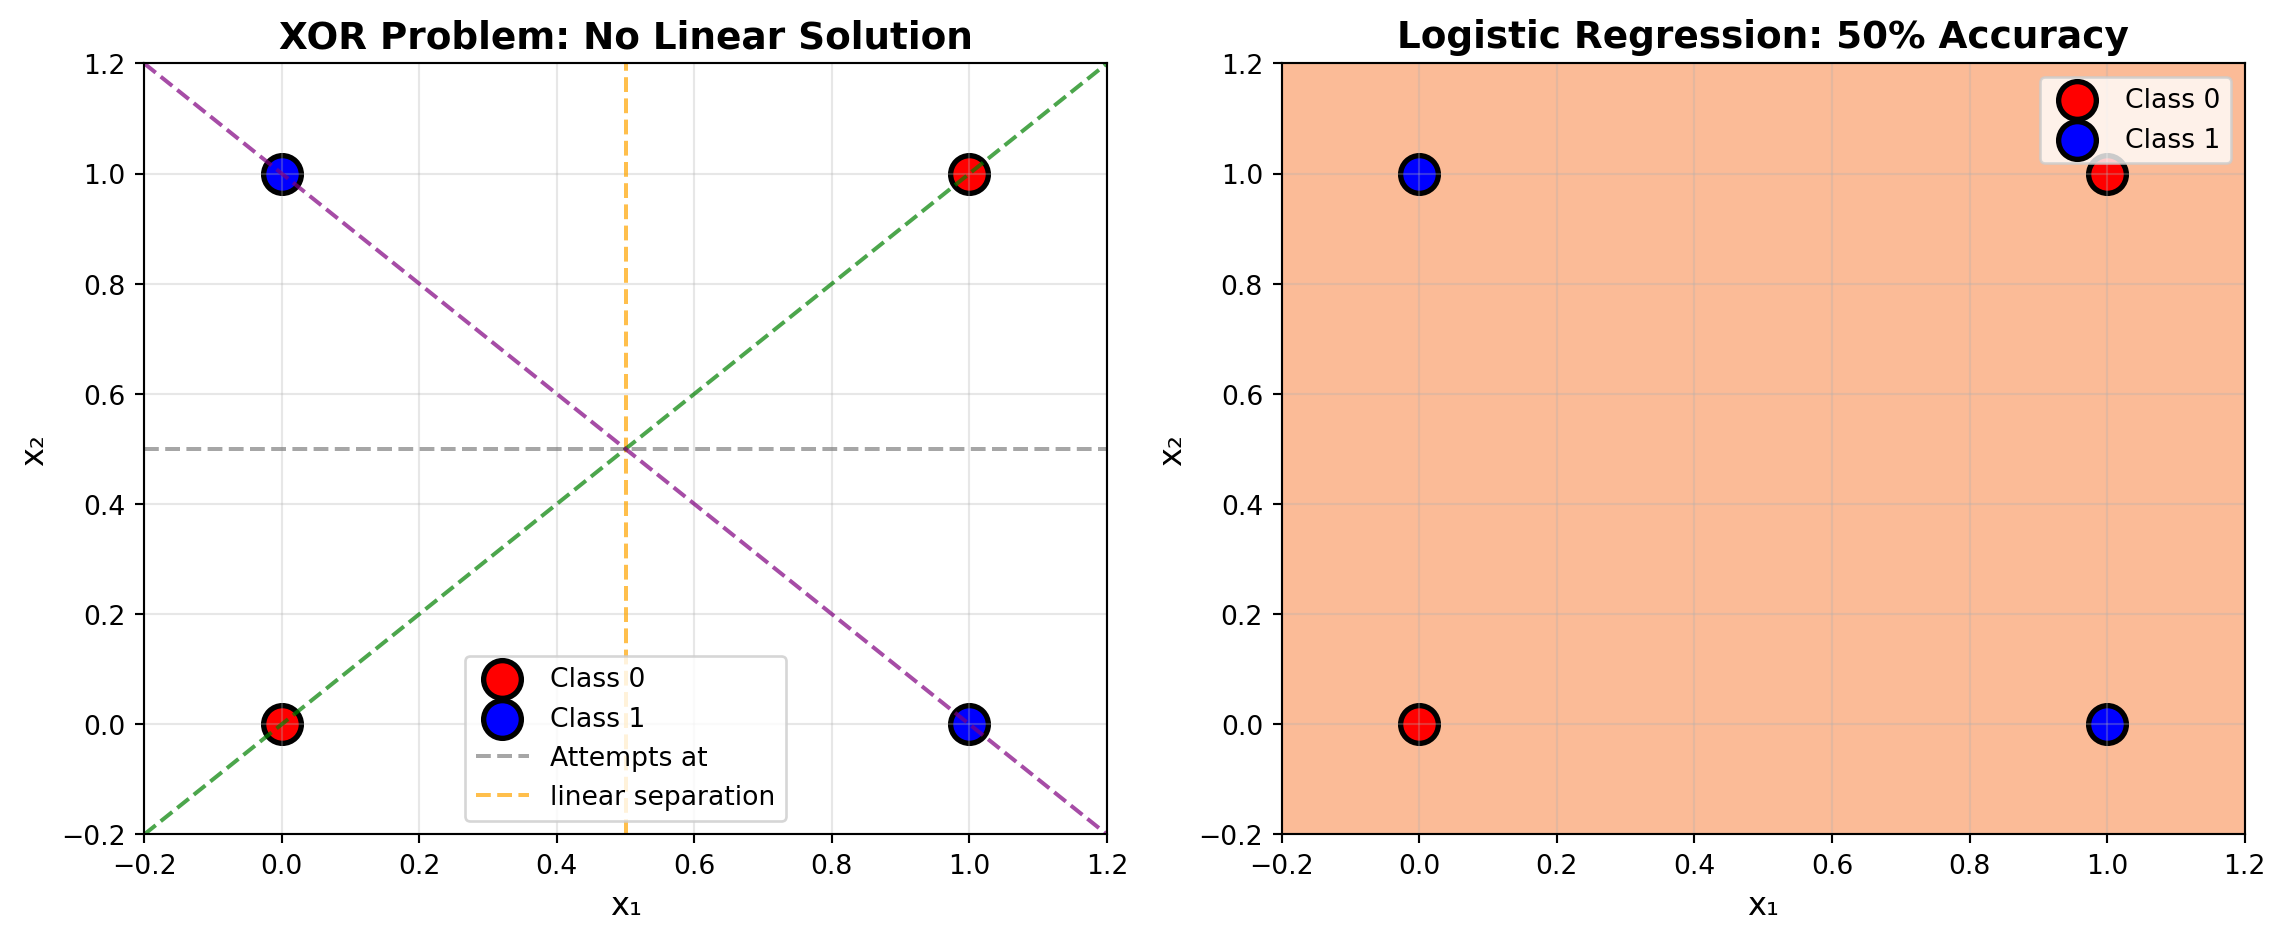

Single layer model accuracy: 50.0% - Cannot solve XOR!


In [2]:
# Demonstrate single layer linear model failure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

colors = ['red', 'blue']

# Left plot: Show the XOR problem
for i in range(2):
    mask = y == i
    ax1.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'Class {i}', edgecolors='black', linewidth=2)

# Try multiple linear separators to show they all fail
x_line = np.linspace(-0.2, 1.2, 100)
ax1.plot(x_line, 0.5 * np.ones_like(x_line), '--', color='gray', alpha=0.7, label='Attempts at')
ax1.plot(0.5 * np.ones_like(x_line), x_line, '--', color='orange', alpha=0.7, label='linear separation')
ax1.plot(x_line, x_line, '--', color='green', alpha=0.7)
ax1.plot(x_line, 1-x_line, '--', color='purple', alpha=0.7)

ax1.set_xlim(-0.2, 1.2)
ax1.set_ylim(-0.2, 1.2)
ax1.set_xlabel('x₁', fontsize=12)
ax1.set_ylabel('x₂', fontsize=12)
ax1.set_title('XOR Problem: No Linear Solution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right plot: Logistic regression attempt
log_reg = LogisticRegression()
log_reg.fit(X, y)
accuracy = log_reg.score(X, y)

xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = log_reg.predict_proba(grid_points)[:, 1].reshape(xx.shape)

ax2.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
ax2.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

for i in range(2):
    mask = y == i
    ax2.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'Class {i}', edgecolors='black', linewidth=2)

ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)
ax2.set_xlabel('x₁', fontsize=12)
ax2.set_ylabel('x₂', fontsize=12)
ax2.set_title(f'Logistic Regression: {accuracy:.0%} Accuracy', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Single layer model accuracy: {accuracy:.1%} - Cannot solve XOR!")

## Limitation 2: Multiple Layer Linear Model (Without Activation)

Even stacking multiple linear layers doesn't help! Multiple linear transformations are mathematically equivalent to a single linear transformation.

In [3]:
# Demonstrate that multiple linear layers = single linear layer
print("Mathematical proof: Multiple linear layers collapse to one layer")
print("================================================================")
print()
print("Layer 1: h₁ = W₁x + b₁")
print("Layer 2: h₂ = W₂h₁ + b₂ = W₂(W₁x + b₁) + b₂ = (W₂W₁)x + (W₂b₁ + b₂)")
print()
print("Result: Still just Wx + b (a single linear transformation)")
print()
print("Conclusion: Stacking linear layers without activation functions")
print("            doesn't increase the model's expressive power!")

Mathematical proof: Multiple linear layers collapse to one layer

Layer 1: h₁ = W₁x + b₁
Layer 2: h₂ = W₂h₁ + b₂ = W₂(W₁x + b₁) + b₂ = (W₂W₁)x + (W₂b₁ + b₂)

Result: Still just Wx + b (a single linear transformation)

Conclusion: Stacking linear layers without activation functions
            doesn't increase the model's expressive power!


## The Solution: ReLU Activation Function

ReLU (Rectified Linear Unit) provides the nonlinearity needed to solve XOR:
- **ReLU(z) = max(0, z)**
- Clips negative values to zero, keeping positive values unchanged

Let's see how ReLU transforms the XOR problem to make it solvable.

In [4]:
# Define ReLU and sigmoid functions
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# Hand-crafted network weights and biases that solve XOR
print("Network Architecture for XOR Solution:")
print("====================================")
print()

# Hidden layer weights and biases
W1 = np.array([[1, -1], [-1, 1]])
b1 = np.array([0, 0])

# Output layer weights and bias  
w2 = np.array([1, 1])
b2 = -0.5

print("Hidden Layer:")
print(f"W₁ = {W1}")
print(f"b₁ = {b1}")
print()
print("Output Layer:")
print(f"w₂ = {w2}")
print(f"b₂ = {b2}")
print()

# Forward pass function
def forward_pass(X, W1, b1, w2, b2):
    # Hidden layer (linear transformation)
    z1 = X @ W1.T + b1
    # ReLU activation
    h1 = relu(z1)
    # Output layer
    z2 = h1 @ w2 + b2
    output = sigmoid(z2)
    return output, h1, z1

# Apply network to XOR data
outputs, hidden_activations, pre_activations = forward_pass(X, W1, b1, w2, b2)
predictions = (outputs > 0.5).astype(int)
accuracy = (predictions == y).mean()

print(f"Network Accuracy: {accuracy:.0%}")

Network Architecture for XOR Solution:

Hidden Layer:
W₁ = [[ 1 -1]
 [-1  1]]
b₁ = [0 0]

Output Layer:
w₂ = [1 1]
b₂ = -0.5

Network Accuracy: 100%


### Transformation Table: How ReLU Solves XOR

Let's trace through exactly what happens to each input:

In [5]:
# Create detailed transformation table
print("Complete Transformation Table:")
print("=============================")
print()
print("Input   | Pre-ReLU  | Post-ReLU | Output | Prediction | Target | Correct?")
print("(x₁,x₂) | (z₁, z₂)  | (h₁, h₂)  | prob   | class      | y      |")
print("--------|-----------|-----------|--------|------------|--------|----------")

for i in range(4):
    input_str = f"({X[i,0]},{X[i,1]})"
    pre_relu_str = f"({pre_activations[i,0]:2.0f},{pre_activations[i,1]:2.0f})"
    post_relu_str = f"({hidden_activations[i,0]:.0f},{hidden_activations[i,1]:.0f})"
    output_str = f"{outputs[i]:.3f}"
    pred_str = f"{predictions[i]}"
    target_str = f"{y[i]}"
    correct_str = "✓" if predictions[i] == y[i] else "✗"
    
    print(f"{input_str:7} | {pre_relu_str:9} | {post_relu_str:9} | {output_str:6} | {pred_str:10} | {target_str:6} | {correct_str}")

print()
print("Key Insight: ReLU transforms (-1,1) → (0,1) and (1,-1) → (1,0)")
print("This makes the XOR classes linearly separable in the hidden space!")

Complete Transformation Table:

Input   | Pre-ReLU  | Post-ReLU | Output | Prediction | Target | Correct?
(x₁,x₂) | (z₁, z₂)  | (h₁, h₂)  | prob   | class      | y      |
--------|-----------|-----------|--------|------------|--------|----------
(0,0)   | ( 0, 0)   | (0,0)     | 0.378  | 0          | 0      | ✓
(0,1)   | (-1, 1)   | (0,1)     | 0.622  | 1          | 1      | ✓
(1,0)   | ( 1,-1)   | (1,0)     | 0.622  | 1          | 1      | ✓
(1,1)   | ( 0, 0)   | (0,0)     | 0.378  | 0          | 0      | ✓

Key Insight: ReLU transforms (-1,1) → (0,1) and (1,-1) → (1,0)
This makes the XOR classes linearly separable in the hidden space!


### Step 1: Original Input Space

The XOR problem in its raw form - notice how no single line can separate the classes:

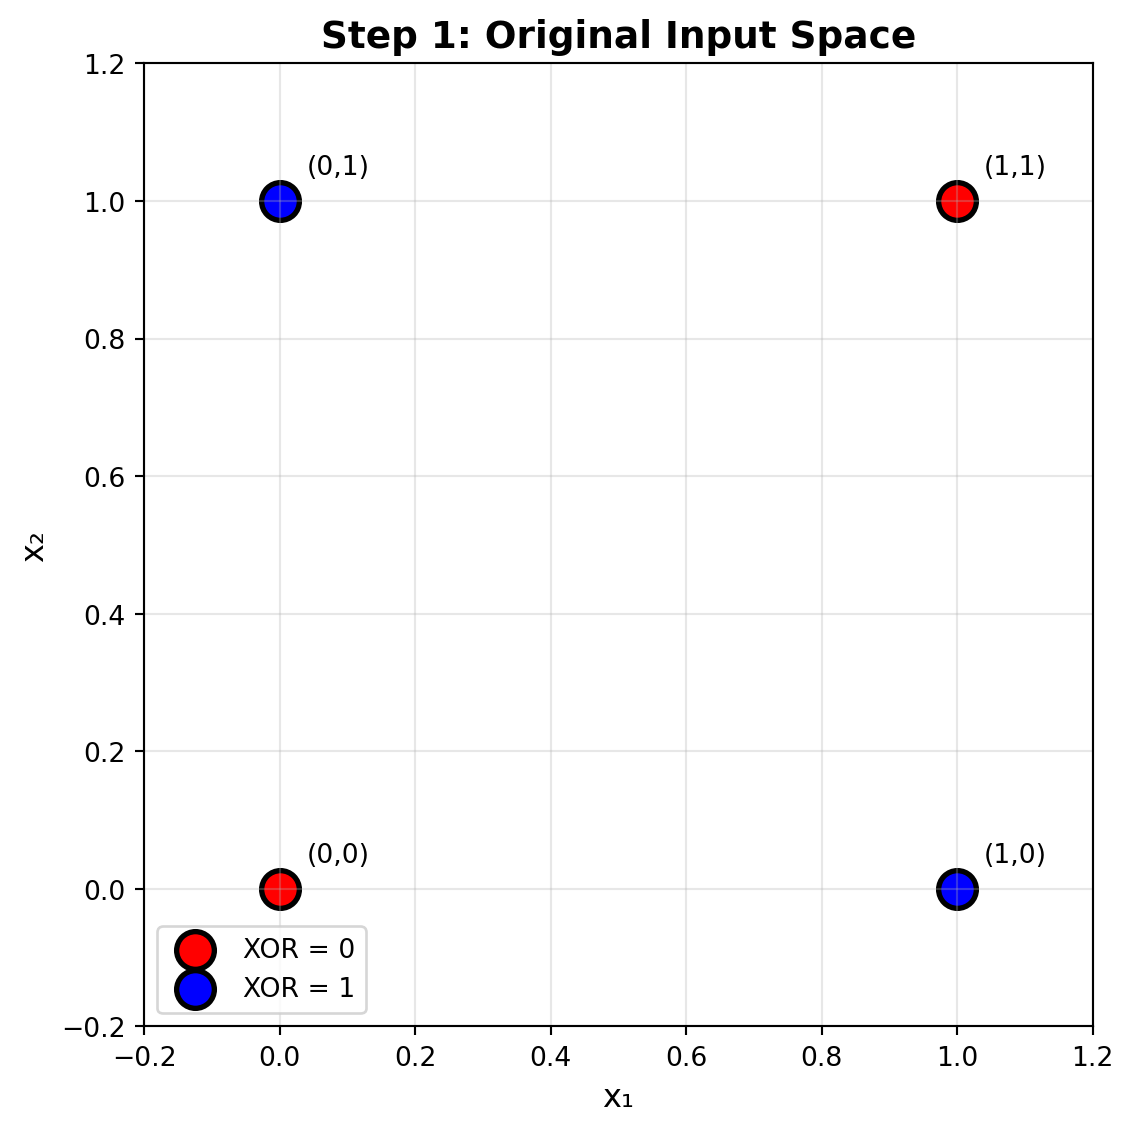

In [6]:
# Step 1 visualization: Original Input Space
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(2):
    mask = y == i
    ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'XOR = {i}', edgecolors='black', linewidth=2)

# Annotate each point
for i in range(4):
    ax.annotate(f'({X[i,0]},{X[i,1]})', X[i], xytext=(10, 10), 
                textcoords='offset points', fontsize=10)

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Step 1: Original Input Space', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 2: Linear Transformation (Before ReLU)

The network applies weights W₁ and biases b₁ to transform the input space:

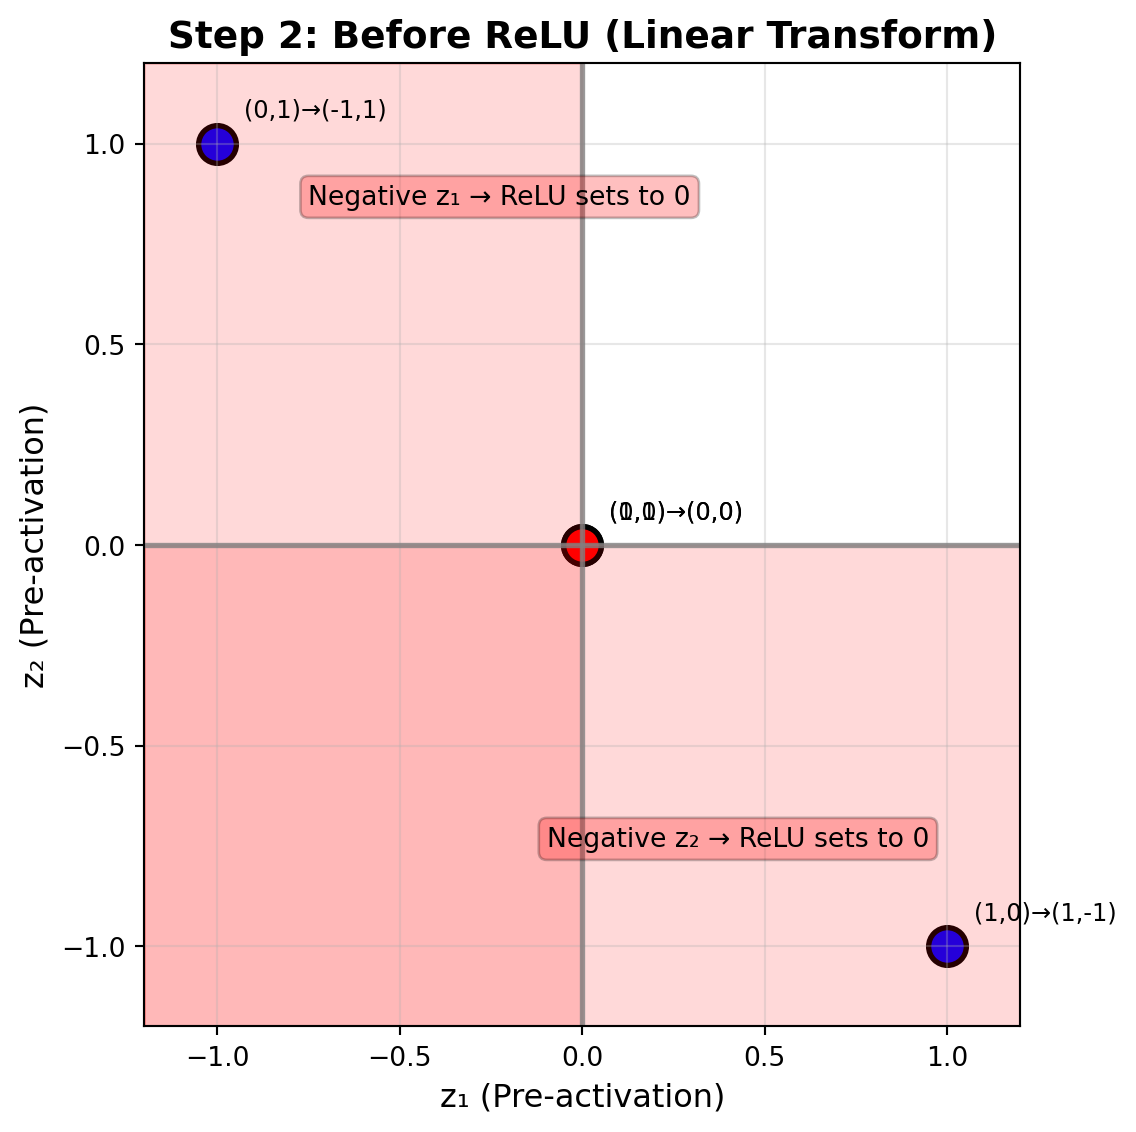

In [7]:
# Step 2 visualization: Pre-activation space
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(4):
    ax.scatter(pre_activations[i, 0], pre_activations[i, 1], 
               c=colors[y[i]], s=200, edgecolors='black', linewidth=2)

# Draw ReLU boundaries
ax.axhline(0, color='gray', linestyle='-', alpha=0.8, linewidth=2)
ax.axvline(0, color='gray', linestyle='-', alpha=0.8, linewidth=2)

# Shade all regions where coordinates turn negative (and thus get clipped by ReLU)
ax.axvspan(-1.2, 0, alpha=0.15, color='red')
ax.axhspan(-1.2, 0, alpha=0.15, color='red')
ax.text(-0.75, 0.85, 'Negative z₁ → ReLU sets to 0', ha='left', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='red', alpha=0.25))
ax.text(0.95, -0.75, 'Negative z₂ → ReLU sets to 0', ha='right', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='red', alpha=0.25))

# Annotate points with input labels
labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
for i, label in enumerate(labels):
    pre_coord = f'({pre_activations[i,0]:.0f},{pre_activations[i,1]:.0f})'
    ax.annotate(f'{label}→{pre_coord}', pre_activations[i], xytext=(10, 10), 
                textcoords='offset points', fontsize=9)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('z₁ (Pre-activation)', fontsize=12)
ax.set_ylabel('z₂ (Pre-activation)', fontsize=12)
ax.set_title('Step 2: Before ReLU (Linear Transform)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Step 3: ReLU Transformation

ReLU clips negative values to zero, transforming the space to make it linearly separable:

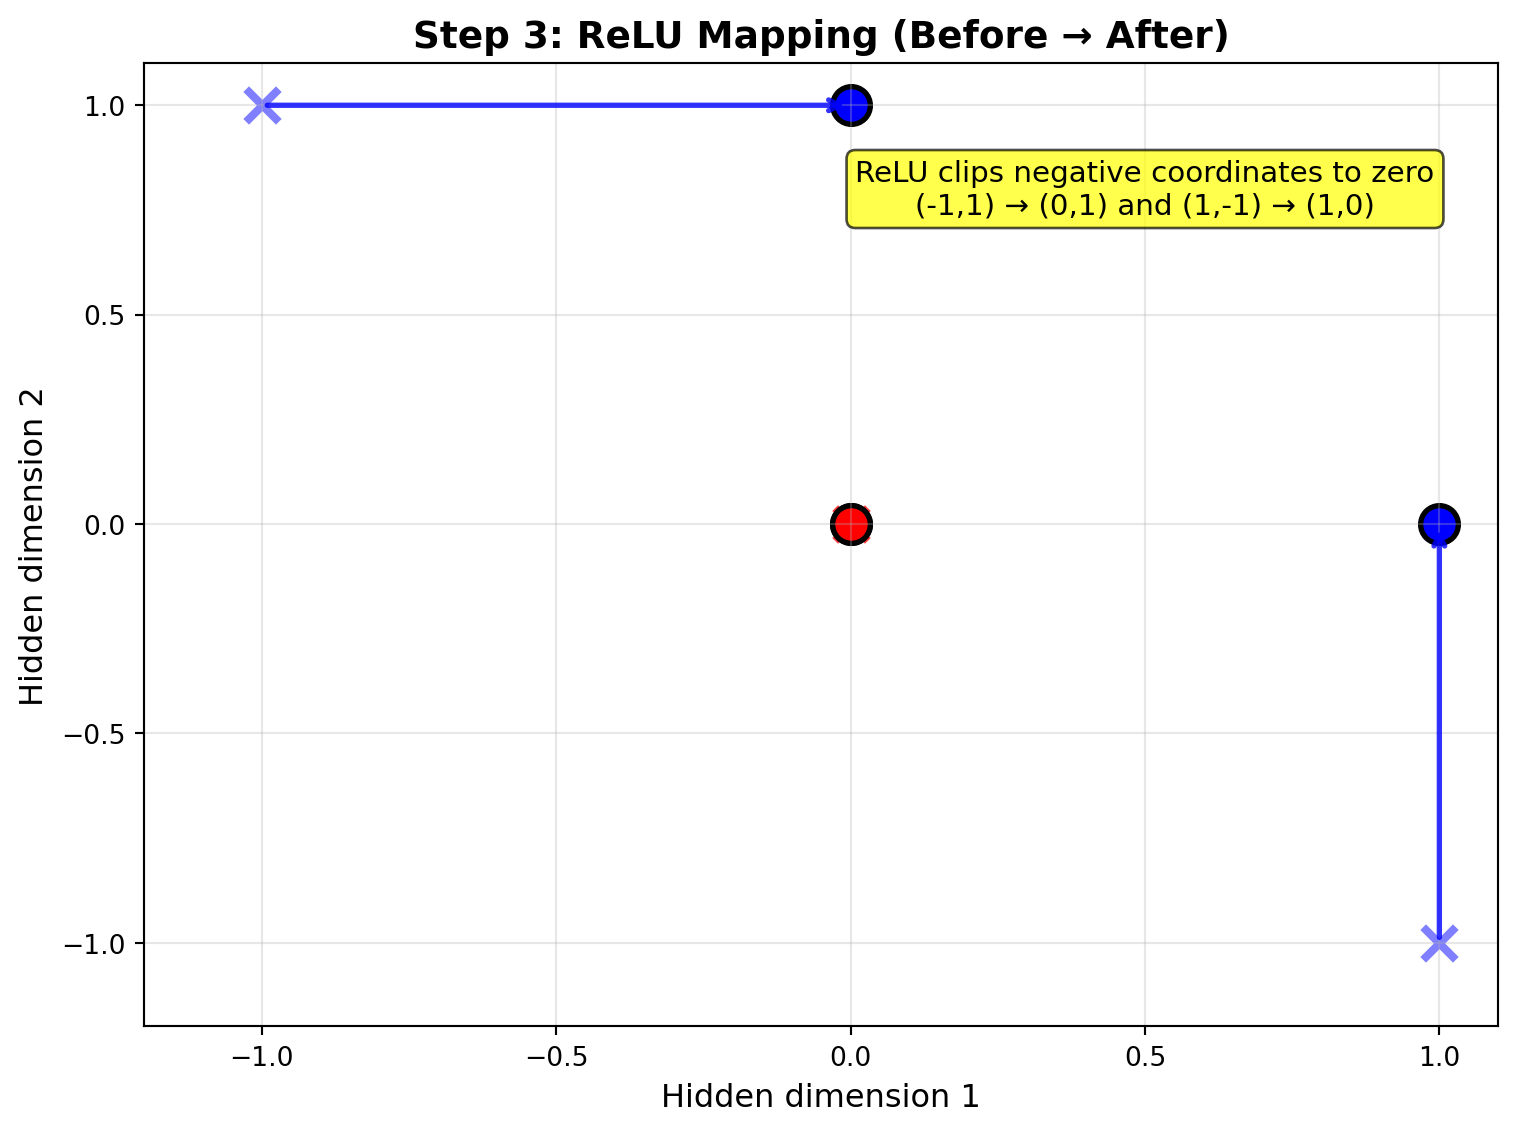

In [8]:
# Step 3 visualization: ReLU transformation with arrows
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for i in range(4):
    # Pre-ReLU positions (X marks)
    ax.scatter(pre_activations[i, 0], pre_activations[i, 1], 
               marker='x', s=150, c=colors[y[i]], alpha=0.5, linewidth=3)
    # Post-ReLU positions (circles) 
    ax.scatter(hidden_activations[i, 0], hidden_activations[i, 1], 
               marker='o', s=200, c=colors[y[i]], edgecolors='black', linewidth=2)
    
    # Draw transformation arrows
    start = pre_activations[i]
    end = hidden_activations[i]
    if not np.array_equal(start, end):
        ax.annotate('', xy=end, xytext=start,
                    arrowprops=dict(arrowstyle='->', lw=2, color=colors[y[i]], alpha=0.8))


# Add text box explaining the key transformation
ax.text(0.5, 0.8, 'ReLU clips negative coordinates to zero\n(-1,1) → (0,1) and (1,-1) → (1,0)', 
        ha='center', va='center', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_xlim(-1.2, 1.1)
ax.set_ylim(-1.2, 1.1)
ax.set_xlabel('Hidden dimension 1', fontsize=12)
ax.set_ylabel('Hidden dimension 2', fontsize=12)
ax.set_title('Step 3: ReLU Mapping (Before → After)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 4: Final Classification

With the transformed hidden representation, the network can now perfectly classify XOR:

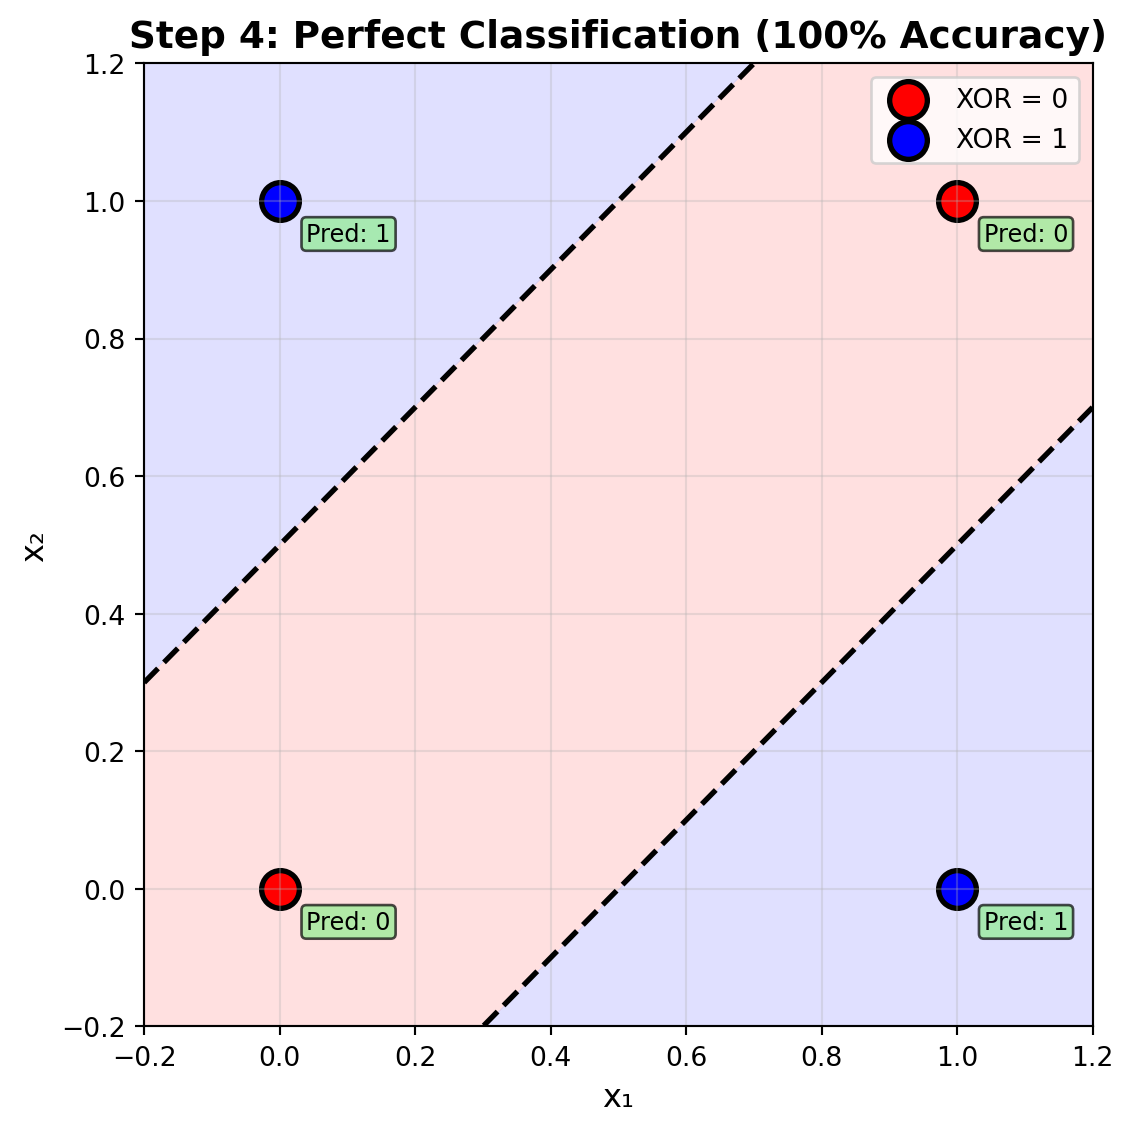

🎯 Final Result: 100% accuracy!
📝 Summary: ReLU activation enables neural networks to solve
   problems that linear models fundamentally cannot handle.


In [9]:
# Step 4 visualization: Final classification results
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Create decision boundary
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs, _, _ = forward_pass(grid_points, W1, b1, w2, b2)
grid_preds = (grid_outputs > 0.5).astype(int).reshape(xx.shape)

ax.contourf(xx, yy, grid_preds, levels=[-0.5, 0.5, 1.5], 
            colors=['#ffcccc', '#ccccff'], alpha=0.6)
ax.contour(xx, yy, grid_outputs.reshape(xx.shape), levels=[0.5], 
           colors='black', linewidths=2, linestyles='--')

for i in range(2):
    mask = y == i
    ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
               label=f'XOR = {i}', edgecolors='black', linewidth=2)

# Annotate final predictions
for i in range(4):
    pred_text = f'Pred: {predictions[i]}'
    ax.annotate(pred_text, X[i], xytext=(10, -15), 
                textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7))

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Step 4: Perfect Classification (100% Accuracy)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🎯 Final Result: {accuracy:.0%} accuracy!")
print("📝 Summary: ReLU activation enables neural networks to solve")
print("   problems that linear models fundamentally cannot handle.")

## Constructive Proof: Hand-crafted XOR Solution

We can construct an explicit solution using ReLU activations. Consider the hidden layer transformation:

$$\mathbf{h} = \text{ReLU}(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)$$

with:
$$\mathbf{W}_1 = \begin{pmatrix} 1 & -1 \\ -1 & 1 \end{pmatrix}, \quad \mathbf{b}_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

This transforms the input space such that the XOR function becomes linearly separable in the hidden representation.

In [10]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# Hand-crafted weights for XOR solution
W1 = np.array([[1, -1], [-1, 1]])
b1 = np.array([0, 0])
w2 = np.array([1, 1])
b2 = -0.5

print("Hand-crafted XOR Network Architecture:")
print(f"W₁ = {W1}")
print(f"b₁ = {b1}")
print(f"w₂ = {w2}")
print(f"b₂ = {b2}")

# Forward pass through the network
def forward_pass(X, W1, b1, w2, b2):
    # Hidden layer
    z1 = X @ W1.T + b1
    h1 = relu(z1)
    
    # Output layer
    z2 = h1 @ w2 + b2
    output = sigmoid(z2)
    
    return output, h1, z1

outputs, hidden_activations, pre_activations = forward_pass(X, W1, b1, w2, b2)
predictions = (outputs > 0.5).astype(int)
accuracy = (predictions == y).mean()

print("\nTransformation Analysis:")
print("Input → Pre-activation → Hidden → Output → Prediction")
for i in range(4):
    print(f"{X[i]} → {pre_activations[i]} → {hidden_activations[i]} → {outputs[i]:.3f} → {predictions[i]}")

print(f"\nAccuracy: {accuracy:.1%}")

Hand-crafted XOR Network Architecture:
W₁ = [[ 1 -1]
 [-1  1]]
b₁ = [0 0]
w₂ = [1 1]
b₂ = -0.5

Transformation Analysis:
Input → Pre-activation → Hidden → Output → Prediction
[0 0] → [0 0] → [0 0] → 0.378 → 0
[0 1] → [-1  1] → [0 1] → 0.622 → 1
[1 0] → [ 1 -1] → [1 0] → 0.622 → 1
[1 1] → [0 0] → [0 0] → 0.378 → 0

Accuracy: 100.0%


## ReLU Transformation Summary

The four-step walkthrough above shows how each XOR input moves through the hidden layer. The table below collects the key numbers for quick reference.

| Input $(x_1,x_2)$ | XOR label | Linear transform $(z_1, z_2)$ | After ReLU $(h_1, h_2)$ | Final prediction |
| --- | --- | --- | --- | --- |
| (0, 0) | 0 | (0, 0) | (0, 0) | 0 |
| (0, 1) | 1 | (-1, 1) | (0, 1) | 1 |
| (1, 0) | 1 | (1, -1) | (1, 0) | 1 |
| (1, 1) | 0 | (0, 0) | (0, 0) | 0 |

The constructive proof and empirical training sections that follow use the same weights, so all downstream outputs stay consistent with this summary.


## Empirical Validation: Learned Solutions
We now train ReLU networks directly on the XOR data. Because ReLU units can go completely inactive when they start on the wrong side of zero, we try a few different random initialisations and keep the best run for each architecture. With enough hidden capacity (two neurons and up), the optimiser consistently finds a perfect solution.


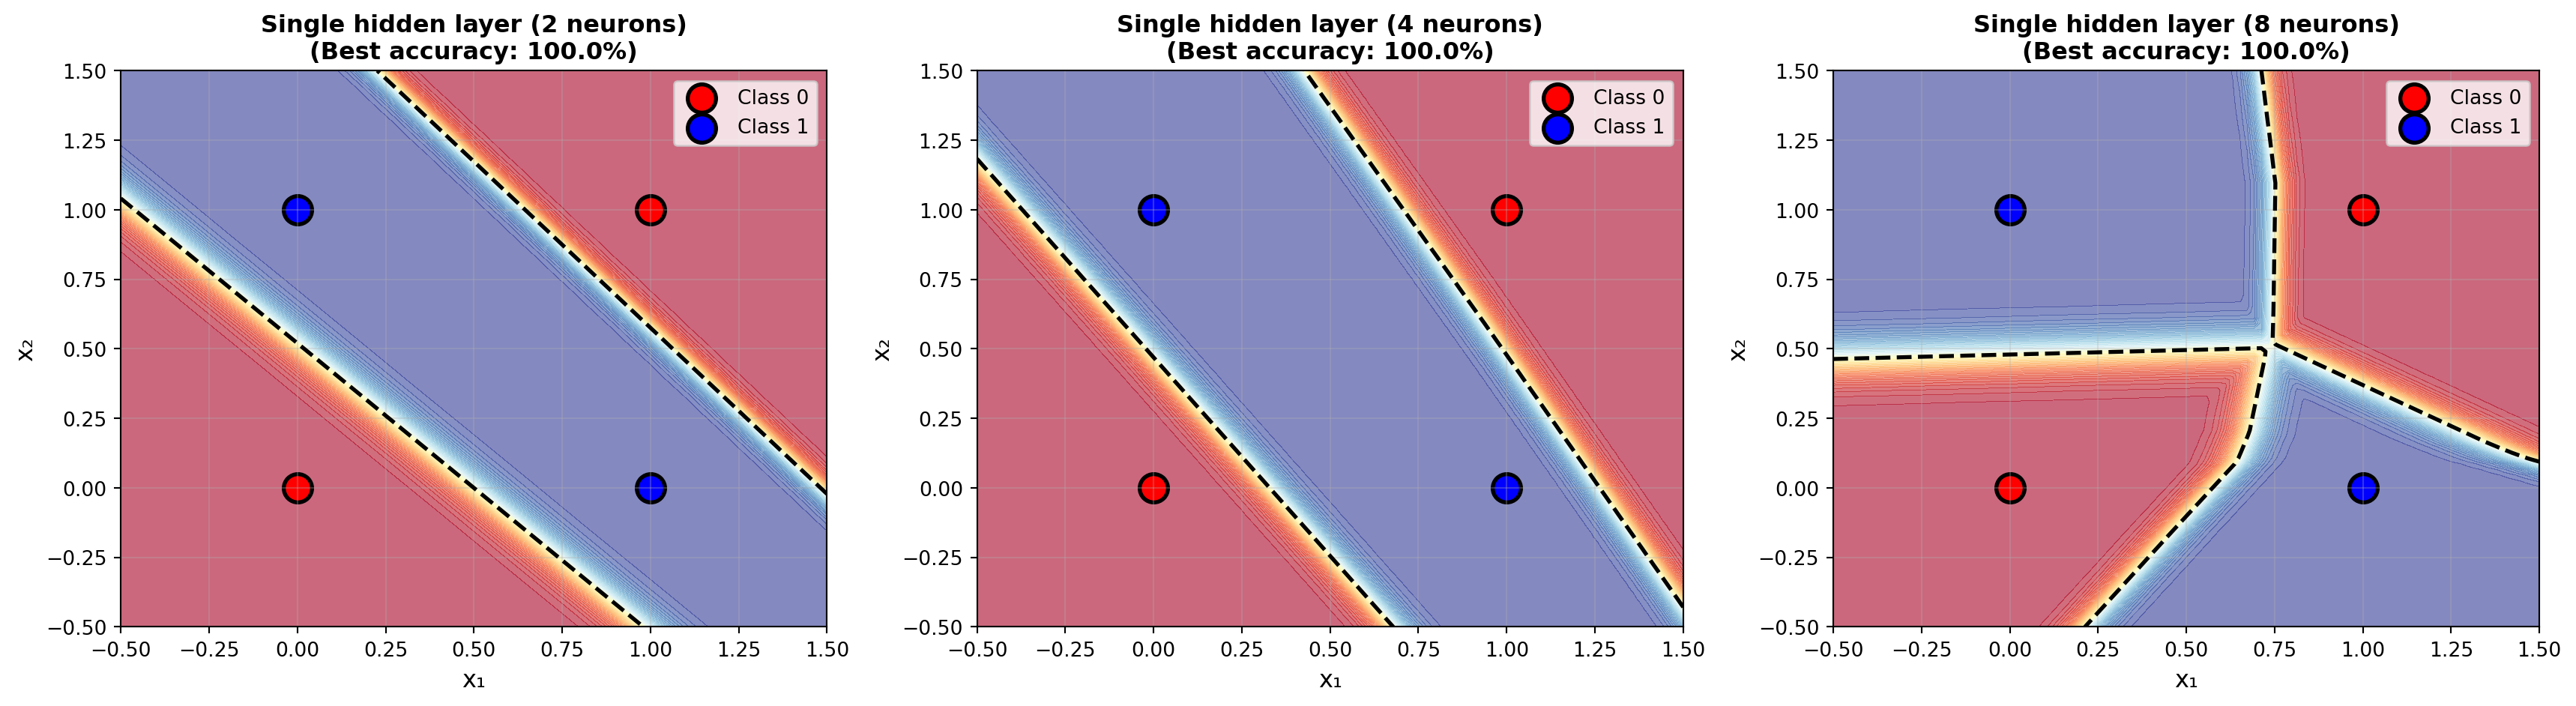

In [11]:
# Train MLP with different architectures and pick the best run for each size
architectures = [
    (2, 'Single hidden layer (2 neurons)'),
    (4, 'Single hidden layer (4 neurons)'),
    (8, 'Single hidden layer (8 neurons)')
]
seeds = range(10)  # Multiple restarts to avoid unlucky dead-ReLU initialisations

fig, axes = plt.subplots(1, len(architectures), figsize=(18, 5))

for idx, (hidden_size, title) in enumerate(architectures):
    best_model = None
    best_score = -1
    for seed in seeds:
        mlp = MLPClassifier(hidden_layer_sizes=(hidden_size,), 
                           activation='relu', 
                           solver='lbfgs', 
                           max_iter=5000,
                           alpha=0.0,
                           random_state=seed)
        mlp.fit(X, y)
        score = mlp.score(X, y)
        if score > best_score:
            best_model = mlp
            best_score = score
        # Early exit once we achieve perfect accuracy
        if best_score == 1.0:
            break

    # Use the best-performing model for visualisation
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = best_model.predict_proba(grid_points)[:, 1].reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    axes[idx].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

    for i in range(2):
        mask = y == i
        axes[idx].scatter(X[mask, 0], X[mask, 1], c=colors[i], s=200, 
                         label=f'Class {i}', edgecolors='black', linewidth=2)

    axes[idx].set_xlim(-0.5, 1.5)
    axes[idx].set_ylim(-0.5, 1.5)
    axes[idx].set_xlabel('x₁', fontsize=12)
    axes[idx].set_ylabel('x₂', fontsize=12)
    axes[idx].set_title(f'{title}\n(Best accuracy: {best_score:.1%})', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Conclusion

The XOR problem demonstrates several fundamental principles in deep learning:

1. **Necessity of Nonlinearity**: Linear models cannot solve XOR, establishing the critical role of nonlinear activation functions.

2. **Feature Transformation**: Hidden layers transform the input representation, making non-linearly separable problems linearly separable in higher-dimensional spaces.

3. **Universal Approximation**: Even simple architectures with sufficient nonlinearity can solve complex classification problems.

This canonical example provides intuition for why deep networks, with their cascade of nonlinear transformations, can approximate arbitrarily complex functions and solve real-world problems that are far more intricate than XOR.